In [6]:
from Utilities.orginizers import LearningData
from sklearn.model_selection import KFold, cross_val_score
from itertools import product
from functools import partial
from random import sample
from multiprocessing import Pool
from Utilities import clustering 
import matplotlib.pyplot as plt
import Utilities
from pandas import DataFrame

ld = LearningData()
sc = clustering.StrengthCalc()

In [8]:
min_numbers = [1,2,5,10,20,30,50]
max_numbers = [325,300,270,250]
steps = [1,2,5,10,20]
tresholds = [0.1, 0.5]

stock_names = sample(ld.get_stock_names(), 5)
market_names = sample(ld.get_market_names(), 5)

def run_model(tup):
    stock, market, min_number, max_number, step, threshold = tup
    stren = sc.get_strength(stock, market, min_number=min_number, max_number=max_number, step=step, threshold=threshold)
    n_clusters = round((max_number-min_number)/step)
    return (stock, market, n_clusters, threshold, stren)

models = list(map(run_model, product(stock_names, market_names, min_numbers, max_numbers, steps, tresholds)))

results = DataFrame(models,columns=('stock', 'market', 'n_clusters', 'threshold', 'strength'))

In [10]:
results.var()

n_clusters    9257.895210
threshold        0.040006
strength         0.204984
dtype: float64

In [11]:
results.describe()

,n_clusters,threshold,strength
count,7000.000000,7000.000000,7000.000000
mean,99.685714,0.300000,0.314270
std,96.217957,0.200014,0.452752
min,10.000000,0.100000,-0.620000
25%,24.750000,0.100000,0.000000
50%,54.000000,0.300000,0.160000
75%,148.250000,0.500000,0.780000
max,324.000000,0.500000,1.000000


KeyError: 'max_number'

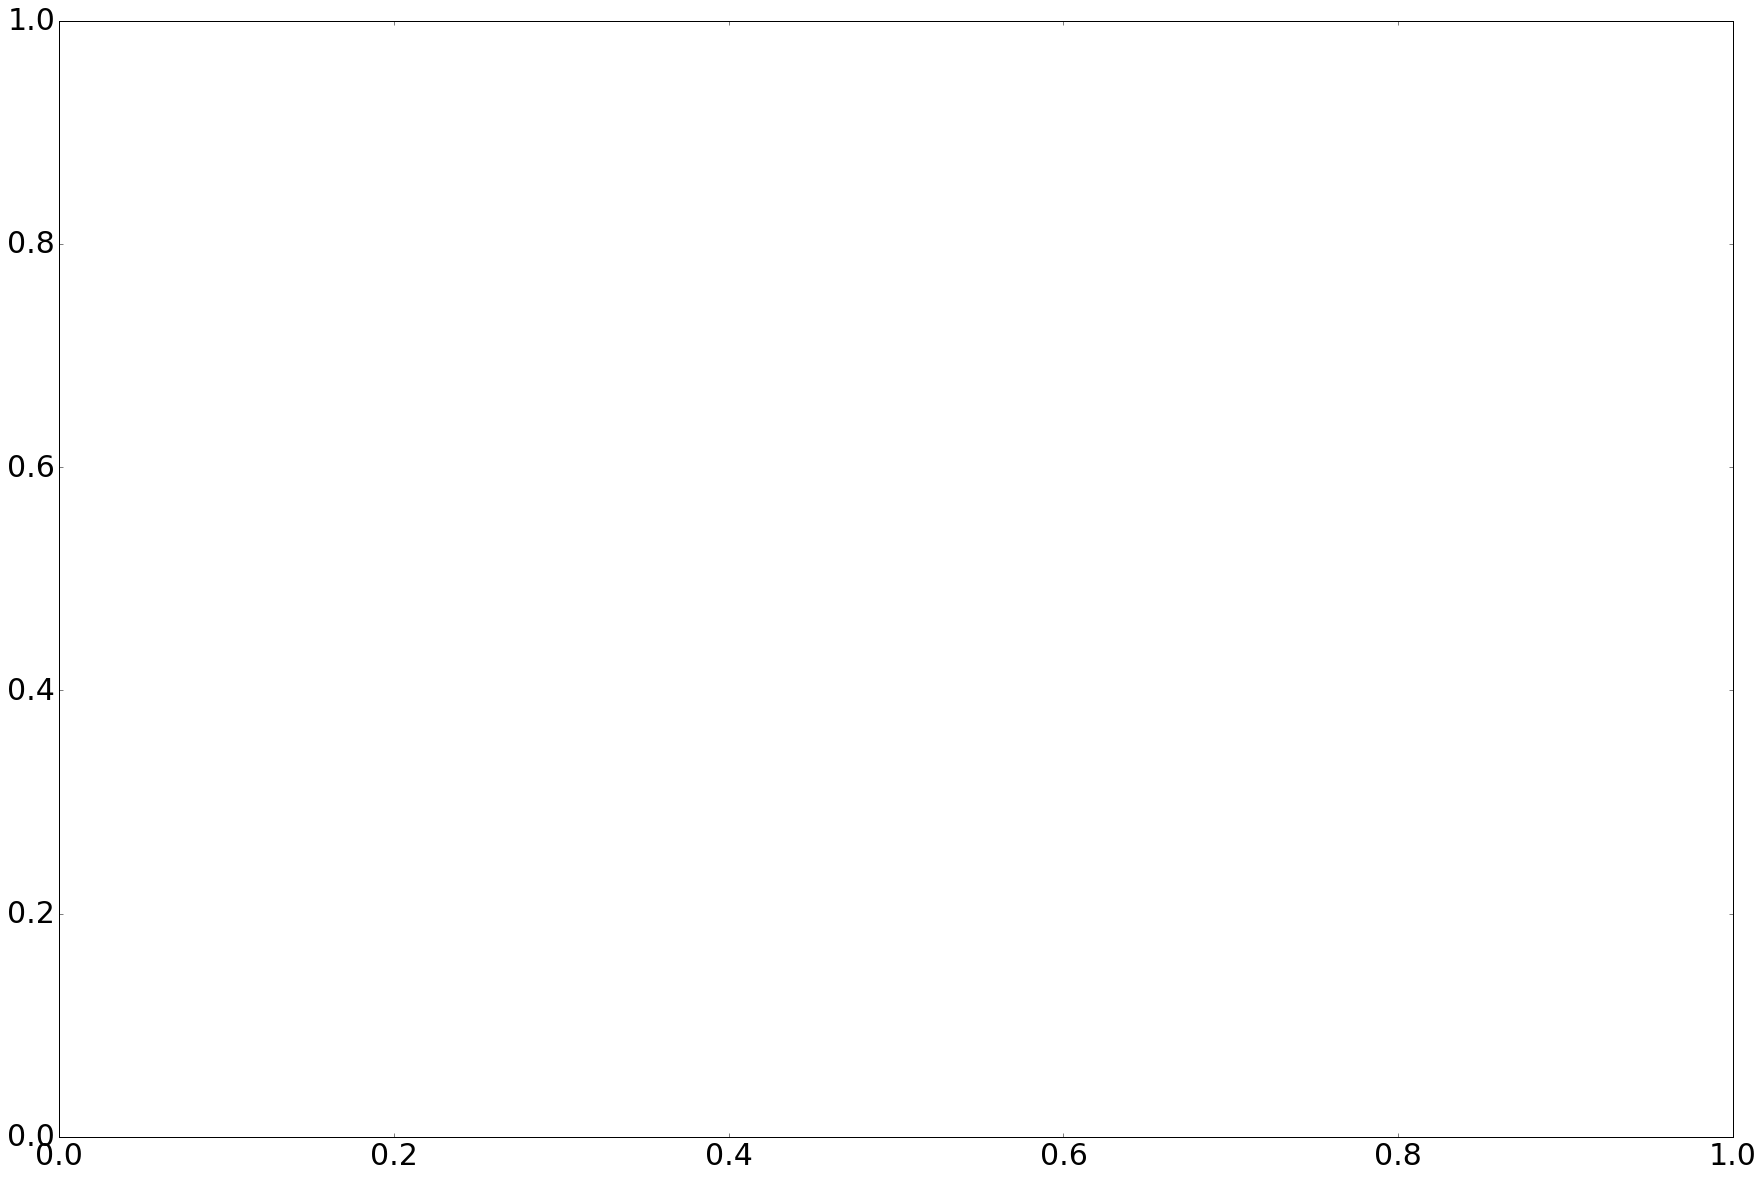

In [12]:
import numpy as np

%matplotlib inline

plt.rc('font', size=30)
fig = plt.figure(figsize=(30, 20))
alpha = 0.6

ax1 = plt.subplot2grid((1,1), (0,0))
for name, group in results.groupby('threshold'):
    # since we are counting values it makes sense to regularize the counts
    group.replace(np.nan, 12).groupby('max_number').agg('mean')['strength'].plot(kind='line', label=name, alpha=alpha)
ax1.set_xlabel('max number of clusters')
plt.legend(loc='best')
ax1.set_title("mean strength" )

KeyError: 'step'

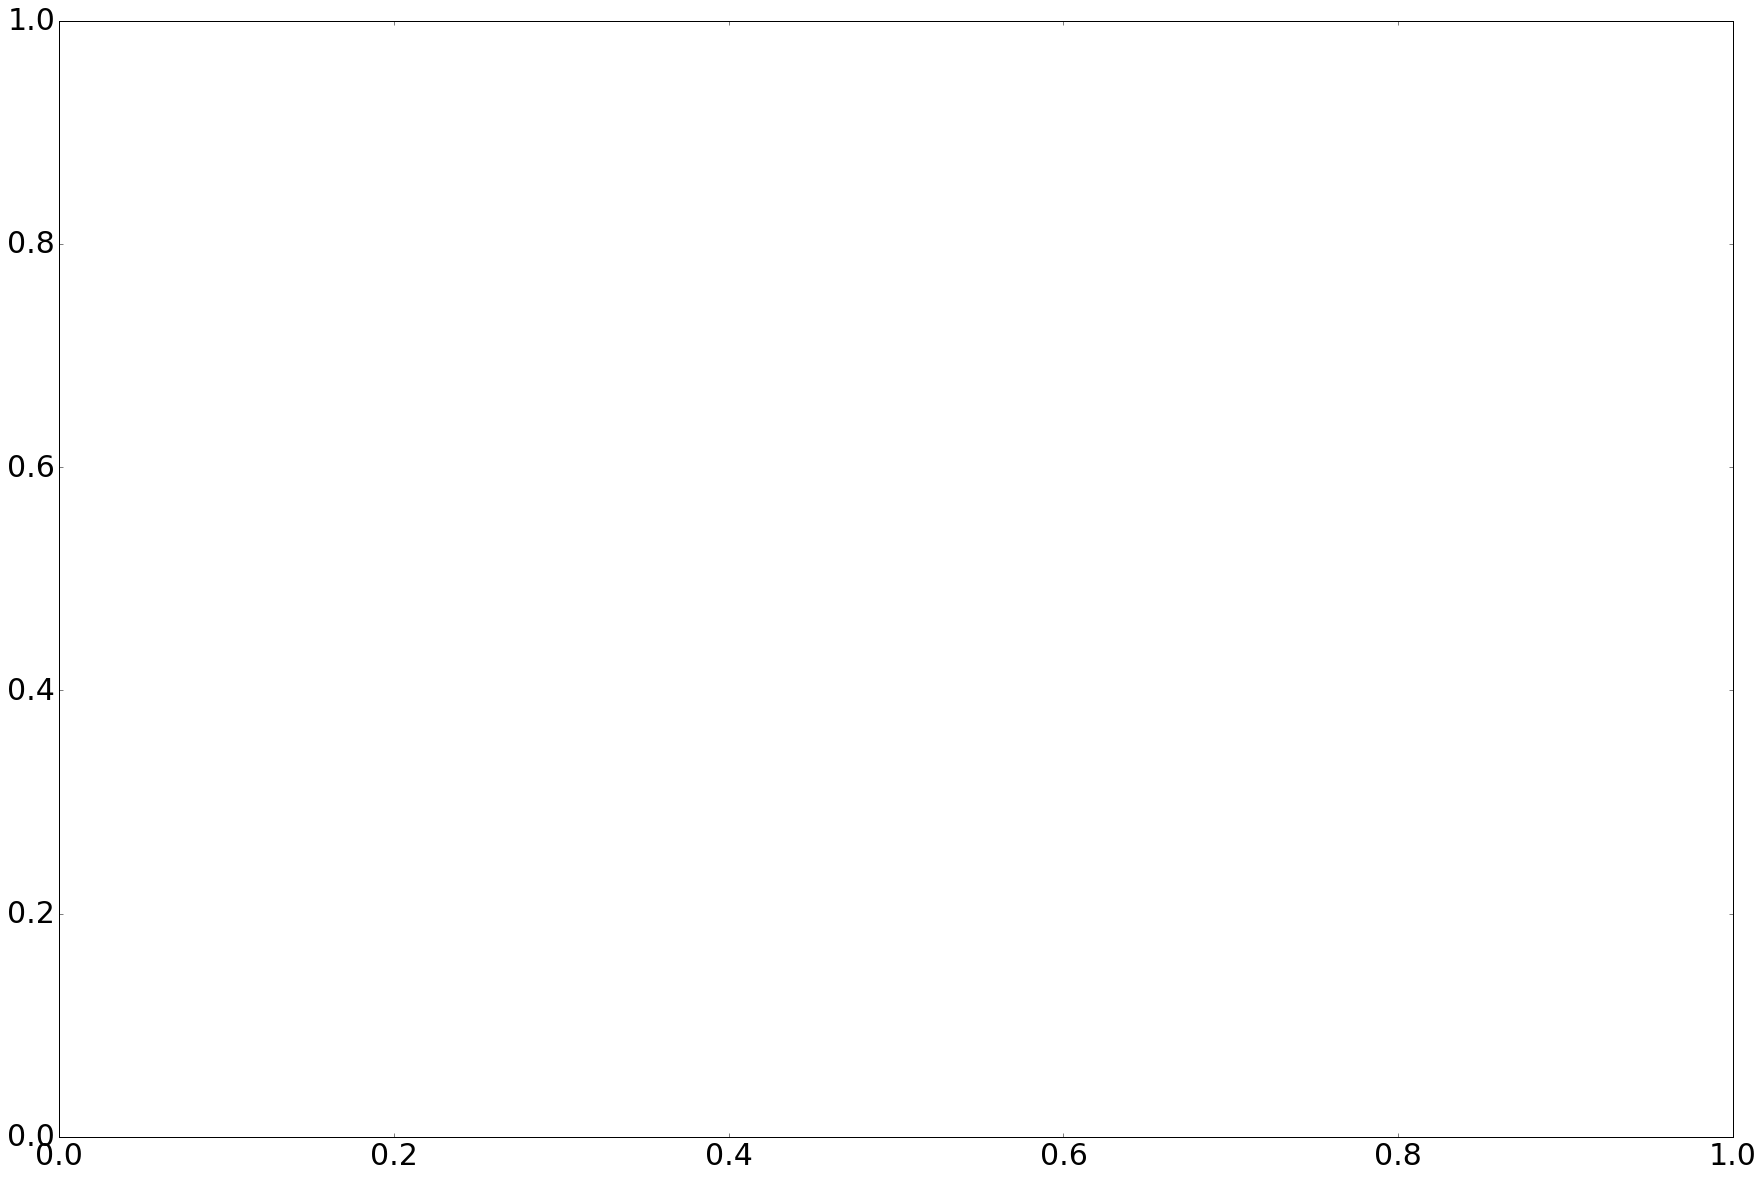

In [13]:
import numpy as np

%matplotlib inline

plt.rc('font', size=30)
fig = plt.figure(figsize=(30, 20))
alpha = 0.6

ax1 = plt.subplot2grid((1,1), (0,0))
for name, group in results.groupby('step'):
    # since we are counting values it makes sense to regularize the counts
    group.replace(np.nan, 12).groupby('max_number').agg('mean')['strength'].plot(kind='line', label=name, alpha=alpha)
ax1.set_xlabel('max number of clusters')
plt.legend(loc='best')
ax1.set_title("mean strength" )

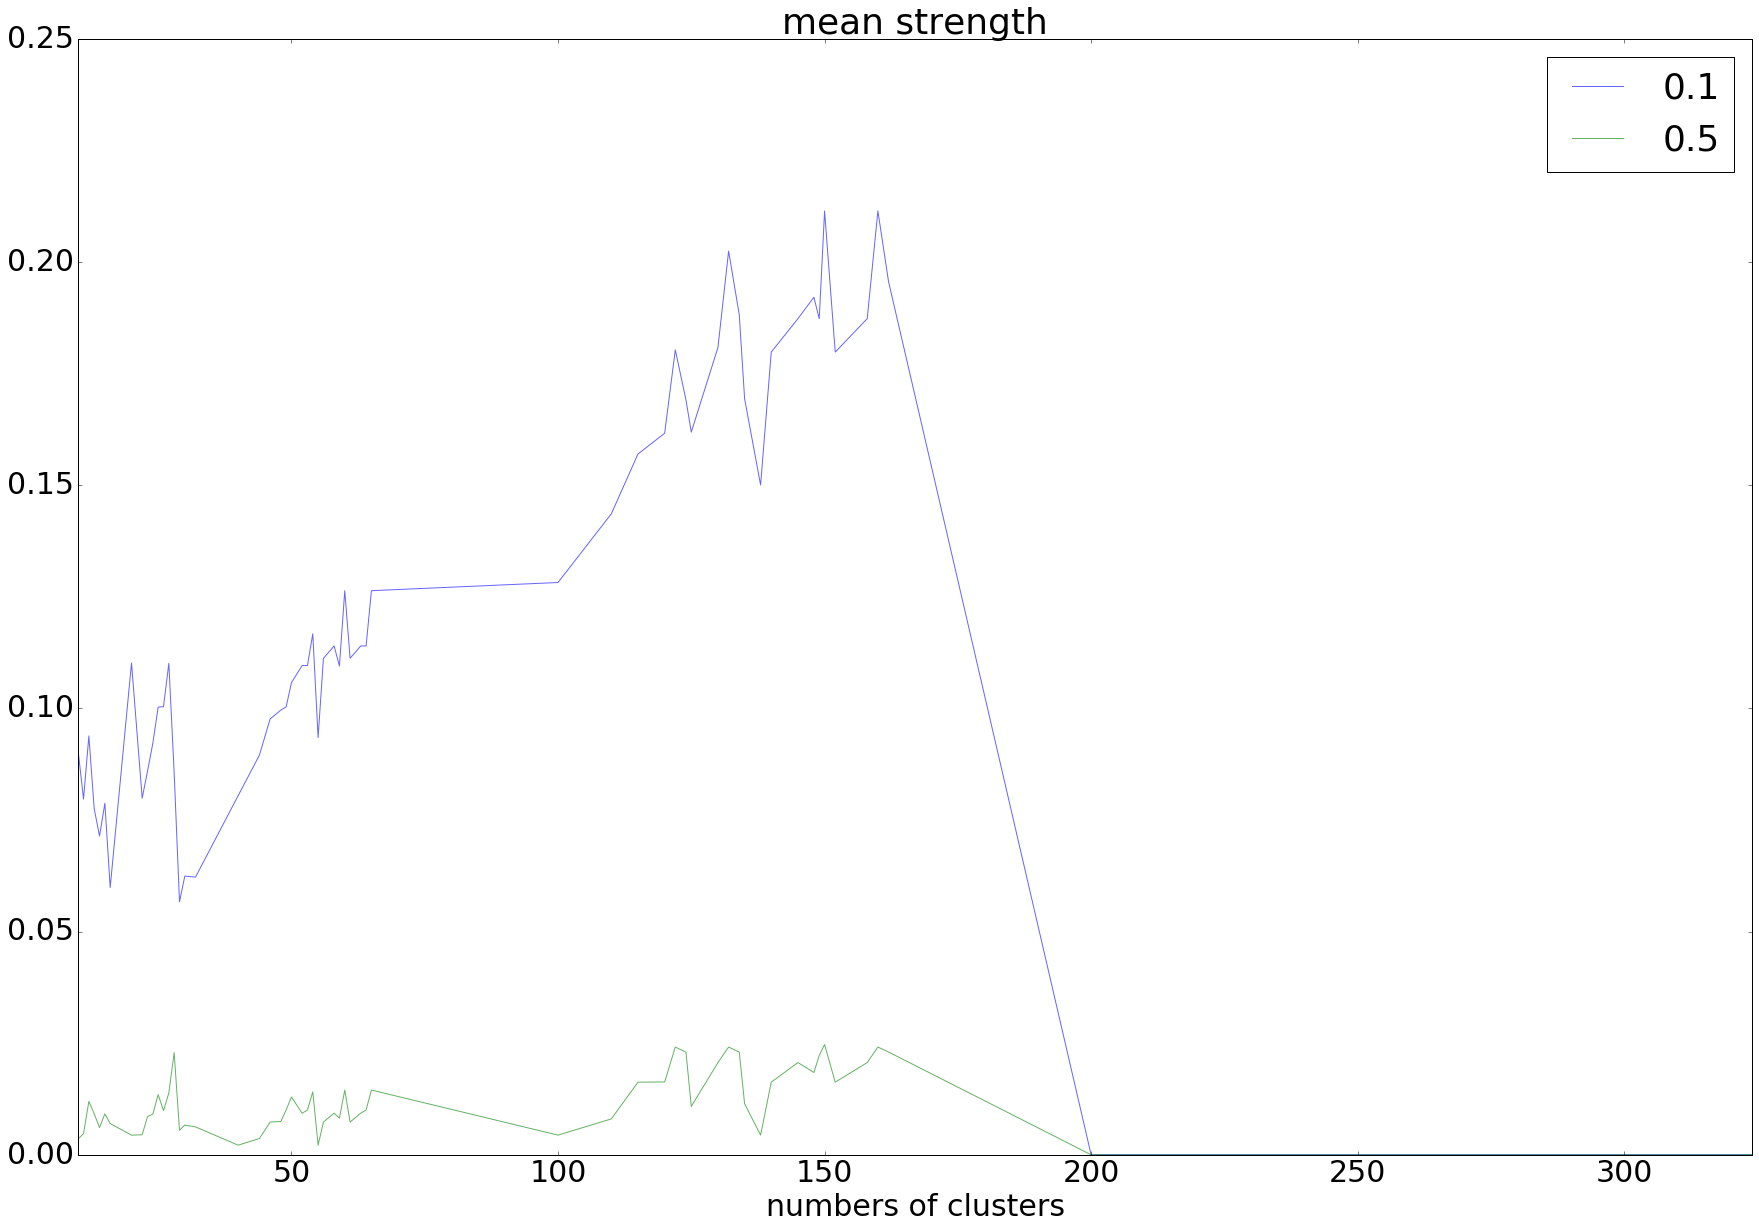

In [14]:
import numpy as np

%matplotlib inline

plt.rc('font', size=30)
fig = plt.figure(figsize=(30, 20))
alpha = 0.6

ax1 = plt.subplot2grid((1,1), (0,0))
for name, group in results.groupby('threshold'):
    # since we are counting values it makes sense to regularize the counts
    group.replace(np.nan, 12).groupby('n_clusters').var().strength.plot(kind='line', label=name, alpha=alpha)
ax1.set_xlabel('numbers of clusters')
plt.legend(loc='best')
ax1.set_title("mean strength" )

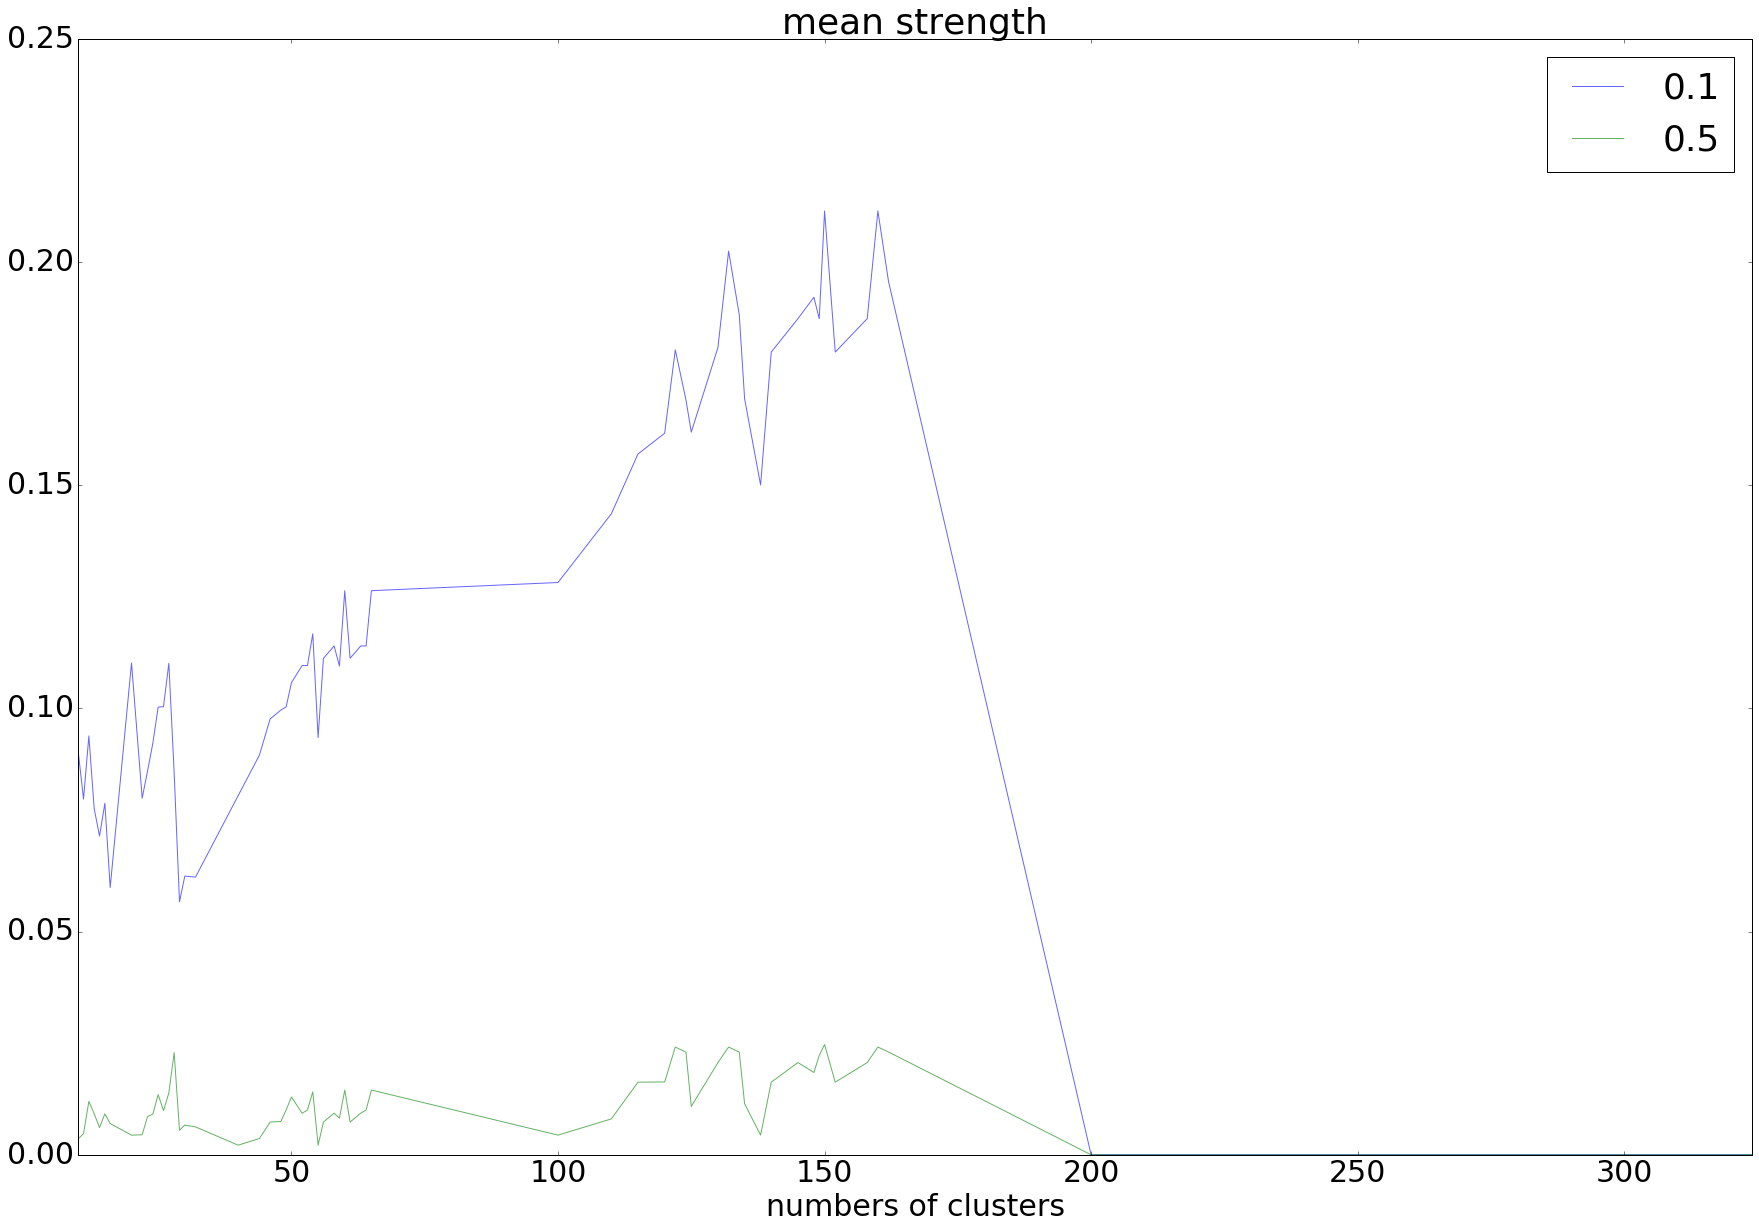

In [16]:
import numpy as np

%matplotlib inline

plt.rc('font', size=30)
fig = plt.figure(figsize=(30, 20))
alpha = 0.6

ax1 = plt.subplot2grid((1,1), (0,0))
for name, group in results.groupby('threshold'):
    # since we are counting values it makes sense to regularize the counts
    group.replace(np.nan, 12).groupby('n_clusters').var().strength.plot(kind='line', label=name, alpha=alpha)
ax1.set_xlabel('numbers of clusters')
plt.legend(loc='best')
ax1.set_title("mean strength" )

In [19]:
temp = results[results.threshold == 0.1].groupby('n_clusters').var()

In [21]:
temp.loc[temp.strength > 0.2]

,threshold,strength
n_clusters,,
132,0.0,0.202442
150,0.0,0.211439
160,0.0,0.211439


After checking we found that we want to use:
    1. min number - 5
    2. max number - 325
    3. step 2
    4. threshold - 0.1